# 选择调色板

颜色在图像风格中比起其他元素显得更为重要。当合理有效地使用颜色时，数据模式会被凸显出来；反之，则会被掩盖。这里有很多数据可视化中关于颜色使用的优秀资源，我推荐阅读这些 Rob Simmon 的[博客文章](https://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/)以及这篇更加学术性的[论文](https://cfwebprod.sandia.gov/cfdocs/CompResearch/docs/ColorMapsExpanded.pdf)。 此外，matplotlib 文档也提供了一篇很好的[教程](https://matplotlib.org/users/colormaps.html)来说明一些内置 Colormap 的感知属性。

seaborn 让您在选择与您处理的数据类型和可视化过程中搭配的配色方案变得简单。

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## 创建调色板

使用离散调色板过程中最重要函数是[`color_palette()`](../generated/seaborn.color_palette.html#seaborn.color_palette "seaborn.color_palette")。这个函数为许多(但不是全部)可以在 seaborn 中生成颜色的方式提供了一个接口，并且在任何具有`palette`参数的函数的内部都可以使用(以及某些需要多种颜色时具有`color`参数的情况)。

[`color_palette()`](../generated/seaborn.color_palette.html#seaborn.color_palette "seaborn.color_palette") 会接受所有的 seaborn 调色板或者 matplotlib Colormap (除了 `jet`, 您永远都不应该使用它). 它还可以获取以任何有效 matplotlib 格式(RGB 元组、十六进制颜色代码或 HTML 颜色名字)指定的颜色列表。返回值始终是 RGB 元组的列表。

最后，在没有参数的情况下调用[`color_palette()`](../generated/seaborn.color_palette.html#seaborn.color_palette "seaborn.color_palette")函数将会返回当前默认的颜色循环。

函数[`set_palette()`](../generated/seaborn.set_palette.html#seaborn.set_palette "seaborn.set_palette")接受相同的参数，并将为所有图像设置默认的颜色循环。您也可以在`with`语句中调用[`color_palette()`](../generated/seaborn.color_palette.html#seaborn.color_palette "seaborn.color_palette")来临时改变调色板。([参见](#palette-contexts))

在不了解数据特征的情况下，通常也不可能知道哪种调色板或 Colormap 最适合一组数据。接下来，我们将通过三种常见的调色板 _ 定性调色板 _, _ 顺序调色板 _, 和 _ 发散调色板 _ 来拆分介绍[`color_palette()`](../generated/seaborn.color_palette.html#seaborn.color_palette "seaborn.color_palette")函数的使用方法以及其他 seaborn 函数。

## 定性调色板

当您想要区分不具有内在顺序的离散数据块时，定性(分类)调色板是最佳方案。

导入 seaborn 的同时，会引入默认的颜色循环，由 6 种颜色构成。并将调用标准 matplotlib 颜色循环，看起来也更加赏心悦目。

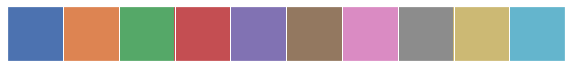

In [2]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

默认主题有六种变体，分别为`deep`, `muted`, `pastel`, `bright`, `dark`, and `colorblind`。

![](http://seaborn.pydata.org/_images/color_palettes_8_0.png)

### 使用循环颜色系统

当您要区分任意数量的类别而不强调任何类别时，最简单的方法是在循环颜色空间中绘制间距相等的颜色(在此颜色空间中，色调会发生变化，同时保持亮度和饱和度不变)。这是大多数 seaborn 函数在处理当需要区分的数据集超过颜色循环中的 6 种颜色时时所使用的默认方法。

最为常用的方法是使用`hls`颜色空间——一种简单的 RGB 值变体。

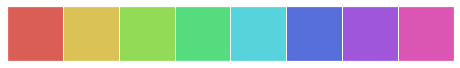

In [3]:
sns.palplot(sns.color_palette("hls", 8))

[`hls_palette()`](../generated/seaborn.hls_palette.html#seaborn.hls_palette "seaborn.hls_palette")函数允许您控制颜色的亮度(lightness)和饱和度(saturation)。

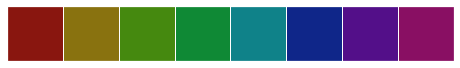

In [4]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8))

然而，由于人类视觉系统的工作方式，RGB 强度很高的颜色也不一定看起来同样强烈。[我们认为](https://en.wikipedia.org/wiki/Color_vision)黄色和绿色是相对较亮的，蓝色是相对较暗的，当目标是与`hls`系统保持一致性时可能会带来一些问题。

为了解决这一问题，seaborn 提供了一个[husl](http://www.hsluv.org/)系统(后来更名为 HSLuv)的接口，这也使选择间隔均匀的色调变得容易，同时使亮度和饱和度都更加均匀。

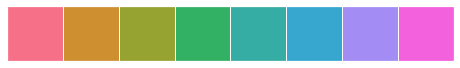

In [5]:
sns.palplot(sns.color_palette("husl", 8))

类似地，[`husl_palette()`](../generated/seaborn.husl_palette.html#seaborn.husl_palette "seaborn.husl_palette")函数也为这个系统提供了一个更灵活的接口。

### 使用 Color Brewer 调色板

[Color Brewer](http://colorbrewer2.org/)为定性调色板提供了另一种美观的配色方案(同样包含顺序调色板包括和发散调色板，详情见下文)。这些也作为 matplotlib Colormap 存在，但并没有得到很好的处理。在 seaborn 中，当您需要定性(qualitative)的 Color Brewer 方案时，你总是会得到离散的颜色，但这意味着在某些情况下颜色会循环重复。

Color Brewer 的一个很好的特点是它对色盲比较友好。[色盲](https：/en.wikipea.org/wiki/Color_Blinity)有很多种，最为常见的是红绿色盲。通常，对于需要根据颜色进行元素区分时，应该尽量避免使用这两种颜色。

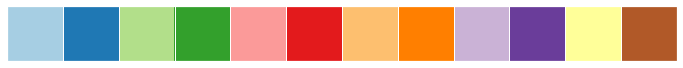

In [6]:
sns.palplot(sns.color_palette("Paired"))

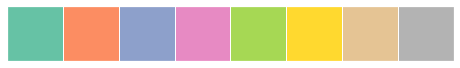

In [7]:
sns.palplot(sns.color_palette("Set2"))

为了帮助您从 Color Brewer 库中选取配色方案，seaborn 提供了[`choose_colorbrewer_palette()`](../generated/seaborn.choose_colorbrewer_palette.html#seaborn.choose_colorbrewer_palette "seaborn.choose_colorbrewer_palette")函数。这个函数能够启动交互式组件来帮助您浏览各种选项，修改不同的参数。但是只能在 Jupyter notebook 中使用。

当然，您可能只希望手动指定一组您喜欢的颜色。[`color_palette()`](../generated/seaborn.color_palette.html#seaborn.color_palette "seaborn.color_palette")函数会接受一个颜色列表，操作起来也很简单。

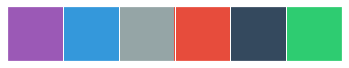

In [8]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

### 使用来自 xkcd color survey 的颜色名字

不久前，[xkcd](https://xkcd.com/)开展了一项[众包工作](https://blog.xkcd.com/2010/05/03/color-survey-results/)来为随机 RGB 颜色命名。产生了[954 个颜色名字](https://xkcd.com/color/rgb/)，您现在可以在 seaborn 中使用`xkcd_rgb`字典来引用它们：

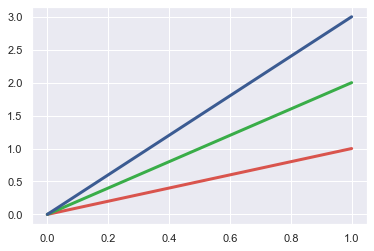

In [9]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3);

除了从`xkcd_rgb`字典中提取单一颜色外，您也可以向[`xkcd_palette()`](../generated/seaborn.xkcd_palette.html#seaborn.xkcd_palette "seaborn.xkcd_palette")函数传递一个颜色名字列表。

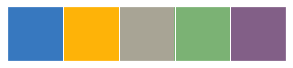

In [10]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

## 顺序调色板

第二类主要的调色板被称为“顺序调色板”(sequential)，当数据集的范围从相对低值(不感兴趣)到相对高值(很感兴趣)时，最好使用顺序调色板，尽管在某些情况下您可能需要顺序调色板中的离散颜色。在[`kdeplot()`](../generated/seaborn.kdeplot.html#seaborn.kdeplot "seaborn.kdeplot")和[`heatmap()`](../generated/seaborn.heatmap.html#seaborn.heatmap "seaborn.heatmap")函数中使用它们来作为 Colormap 则更为常见(以及类似的 matplotlib 函数)。

在这种情况下使用`jet`（或其他彩虹调色板）等 Colormap 是很常见的，因为色调范围给人的印象是提供有关数据的额外信息。然而，具有较大色调变化的 Colormap 往往会引入数据中不存在的不连续性，并且我们的视觉系统无法自然地将彩虹光谱映射到诸如“高”或“低”的定量区分。导致来这些可视化的结果更加令人困惑，因为它们掩盖了数据中的模式，而不是揭示它们。`jet` 调色板使用了最亮的颜色(黄色和青色)的中间数据值，导致效果是强调无趣的(和任意的)值，而不是强调极端的值。

对于连续性的数据，最好使用色调变化幅度较小，而亮度和饱和度变化幅度较大的配色方案。这种方法会很自然地吸引人们注意数据中相对重要的部分。

Color Brewer 库有大量这样的配色方案，它们以调色板中主要的一种或多种颜色命名。

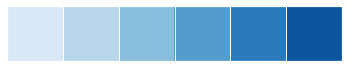

In [11]:
sns.palplot(sns.color_palette("Blues"))

与 matplotlib 类似，您可以通过添加加后缀`_r`来倒置顺序调色板的顺序。

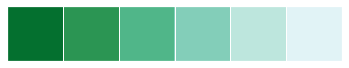

In [12]:
sns.palplot(sns.color_palette("BuGn_r"))

seaborn 同样添加了一个小窍门来帮助您创建“深色”调色板，它没有一个很宽的动态范围。在当您需要按顺序映射直线或点时这可能会很有用，因为颜色较亮的线条会比较难以区分。

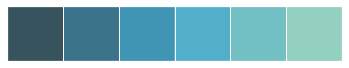

In [13]:
sns.palplot(sns.color_palette("GnBu_d"))

您可能想要使用[`choose_colorbrewer_palette()`](../generated/seaborn.choose_colorbrewer_palette.html#seaborn.choose_colorbrewer_palette "seaborn.choose_colorbrewer_palette")函数来尝试多种选项，当您希望传递给 seaborn 或者 matplotlib 的返回值为 Colormap 对象时，您可以将`as_cmap`对象设置为`True`。

### 顺序 “cubehelix” 调色板

[cubehelix](https://www.mrao.cam.ac.uk/~dag/CUBEHELIX/)调色板系统使顺序调色板的亮度产生线性变化，色调也会产生一些变化。这意味着您的 Colormap 在转换为黑白模式时(用于打印)的信息将得到保留，且对色盲友好。

Matplotlib 内置了默认的 cubehelix 版本：

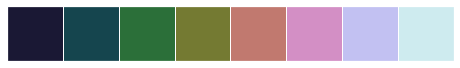

In [14]:
sns.palplot(sns.color_palette("cubehelix", 8))

Seborn 为 cubehelix 系统提供了一个接口，以便您可以制作各种调色板，这些调色板都具有良好的线性亮度渐变。

由 seborn [`cubehelix_palette()`](../generated/seaborn.cubehelix_palette.html#seaborn.cubehelix_palette "seaborn.cubehelix_palette") 函数返回的默认调色板与 matplotlib 的默认值稍有不同，因为它不会围绕色轮旋转很远，也不会覆盖很宽的强度范围。它还反转顺序，以便让更重要的值的颜色更暗：

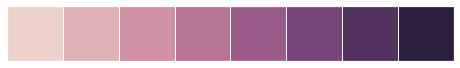

In [15]:
sns.palplot(sns.cubehelix_palette(8))

[`cubehelix_palette()`](../generated/seaborn.cubehelix_palette.html#seaborn.cubehelix_palette "seaborn.cubehelix_palette") 函数的其他参数控制调色板的外观。您将更改的两个主要参数为 `start` (介于 0 到 3 之间的值)和 `rot` —— 旋转次数(任意值，但可能在-1 和 1 之间)。

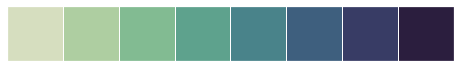

In [16]:
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

您还可以控制端点的亮度，甚至反转渐变：

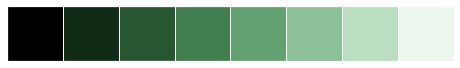

In [17]:
sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))

如同其他 seaborn 函数，您将默认得到一个颜色列表。但您也可以通过修改 `as_cmap=True` 将调色板作为 Colormap 对象的返回值来传递给 seaborn 或 matplotlib 函数。

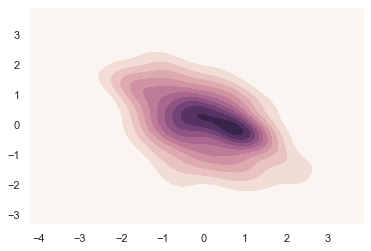

In [18]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

为了帮助您选择更好的调色板或者 Colormap，您可以在 Jupyter notebook 中使用 [`choose_cubehelix_palette()`](../generated/seaborn.choose_cubehelix_palette.html#seaborn.choose_cubehelix_palette "seaborn.choose_cubehelix_palette") 函数来启动互动界面帮助您测试、修改不同的参数。如果您希望函数返回一个 Colormap(而不是列表)，则在例如像 `hexbin` 这样的函数中设置 `as_Cmap=True`。

### 自定义调色板

为了更简单地生成自定义顺序调色板，您可以使用 [`light_palette()`](../generated/seaborn.light_palette.html#seaborn.light_palette "seaborn.light_palette") 或 [`dark_palette()`](../generated/seaborn.dark_palette.html#seaborn.dark_palette "seaborn.dark_palette") 函数。它们都是以某个颜色为种子，从明向暗或从暗向明渐变，产生顺序调色板。与这些函数相搭配的还有 [`choose_light_palette()`](../generated/seaborn.choose_light_palette.html#seaborn.choose_light_palette "seaborn.choose_light_palette") 和 [`choose_dark_palette()`](../generated/seaborn.choose_dark_palette.html#seaborn.choose_dark_palette "seaborn.choose_dark_palette") 来提供交互式组件便于创建调色板。

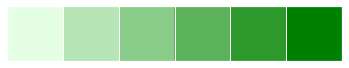

In [19]:
sns.palplot(sns.light_palette("green"))

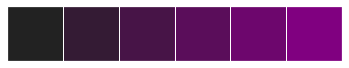

In [20]:
sns.palplot(sns.dark_palette("purple"))

这些调色板同样可以被反转。

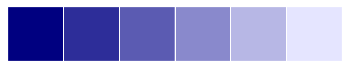

In [21]:
sns.palplot(sns.light_palette("navy", reverse=True))

这些调色板同样可以被用来创建 Colormap 对象而不是颜色列表。

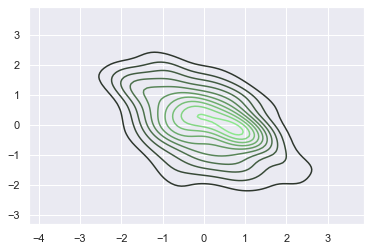

In [22]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x, y, cmap=pal);

默认情况下，输入可以是任何有效的 matplotlib 颜色。替代解释由 `input` 参数控制。现在，您可以在 `hls` 或 `husl` 空间中提供元组以及默认的 `rgb`，您也可以使用任何有效的 `xkcd` 颜色来生成调色板。

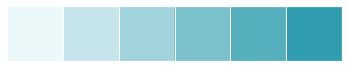

In [23]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

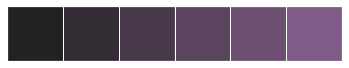

In [24]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

注意，交互式调色板小部件的默认输入空间是 `husl`，它不同于函数本身的默认设置，但是在这种情况下更有用。

## 发散调色板

第三类调色板称为“发散调色板”(diverging)。当数据集的低值和高值都很重要，且数据集中有明确定义的中点时，这会是您的最佳选择。例如，绘制温度相对于基准时间点的变化图时，最好使用发散 Colormap 来同时显示温度相对于基准值的上升和下降

选择良好分散调色板的规则类似于良好的顺序调色板。不过在这种情况时需要注意两端颜色向中间颜色渐变时中间点的颜色不应该喧宾夺主，两端的颜色也应该具有相似的亮度和饱和度。

这里还需要强调的是，应该避免使用红色和绿色，因为需要考虑到[红绿色盲](https://en.wikipedia.org/wiki/Color_blindness)患者的观感。

不出所料，Color Brewer 库也同样提供了一些精心挑选的发散调色板。

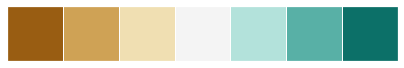

In [25]:
sns.palplot(sns.color_palette("BrBG", 7))

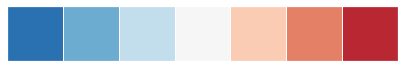

In [26]:
sns.palplot(sns.color_palette("RdBu_r", 7))

matplotlib 库中内置的 `coolwarm` 调色板也是一个很好的选择。请注意，这个 Colormap 的中间值和极值之间的对比度较小。

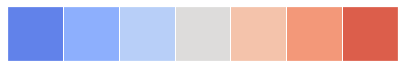

In [27]:
sns.palplot(sns.color_palette("coolwarm", 7))

### 自定义发散调色板

您可以使用 seaborn 的[`diverging_palette()`](../generated/seaborn.diverging_palette.html#seaborn.diverging_palette "seaborn.diverging_palette")函数来创建自定义 colormap 来描述发散数据(搭配有交互式组件[`choose_diverging_palette()`](../generated/seaborn.choose_diverging_palette.html#seaborn.choose_diverging_palette "seaborn.choose_diverging_palette"))。此函数使用 `husl` 颜色系统来创建发散调色板，您需要在函数中设置两个色调参数(用度表示)，也可以选择设置两端颜色的亮度和饱和度。 使用 `husl` 意味着两端到中间点的色调变化将是平衡的。

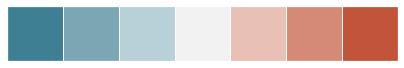

In [28]:
sns.palplot(sns.diverging_palette(220, 20, n=7))

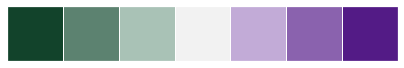

In [29]:
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))

`sep` 参数控制两端到中间点色调变化的间隔。

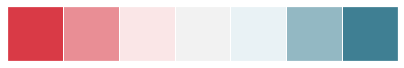

In [30]:
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7))

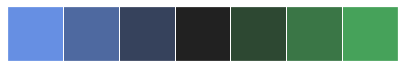

In [31]:
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

## 设置默认调色板

与[`color_palette()`](../generated/seaborn.color_palette.html#seaborn.color_palette "seaborn.color_palette")函数相伴随的有[`set_palette()`](../generated/seaborn.set_palette.html#seaborn.set_palette "seaborn.set_palette")。 两者之间的关系与[美学教程](aesthetics.html#aesthetics-tutorial)中介绍的[`set_palette()`](../generated/seaborn.set_palette.html#seaborn.set_palette "seaborn.set_palette")函数和[`color_palette()`](../generated/seaborn.color_palette.html#seaborn.color_palette "seaborn.color_palette")函数接受相同参数的关系相类似。但它会更改默认的 matplotlib 参数，以便调色板应用于所有图像。

In [32]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

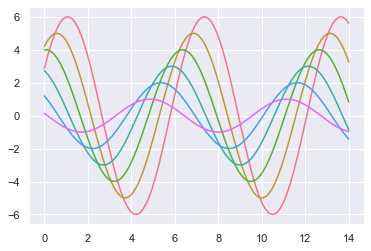

In [33]:
sns.set_palette("husl")
sinplot()

您可以在 `with` 语句中通过 [`color_palette()`](../generated/seaborn.color_palette.html#seaborn.color_palette "seaborn.color_palette") 函数来临时改变调色板。

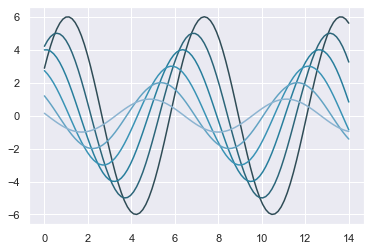

In [34]:
with sns.color_palette("PuBuGn_d"):
    sinplot()